<a href="https://colab.research.google.com/github/Samu-git07/Python/blob/main/Sentiment_Analysis_from_tweet_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['train (1).csv']), encoding='latin-1') # or encoding='cp1252'

In [ ]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.tail()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral,morning,0-20,Guinea,13132795,246000.0,53


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
df.isnull().sum().sum()

2

In [ ]:
df.duplicated().sum()

0

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_columns

['textID',
 'text',
 'selected_text',
 'sentiment',
 'Time of Tweet',
 'Age of User',
 'Country']

In [ ]:
df.shape

(27481, 10)

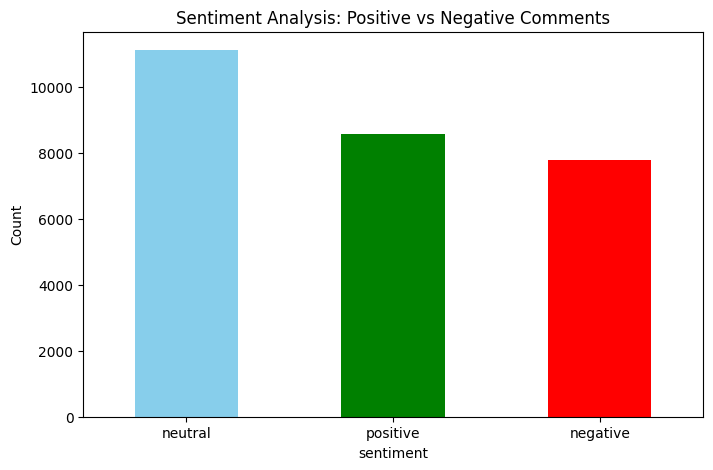

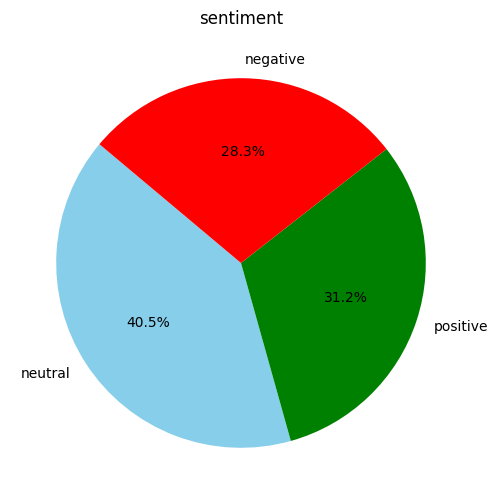

In [ ]:
import matplotlib.pyplot as plt

# Count of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot Bar Chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'green','red'])
plt.xlabel("sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis: Positive vs Negative Comments")
plt.xticks(rotation=0)
plt.show()

# Plot Pie Chart
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'green','red'], startangle=140)
plt.title("sentiment")
plt.ylabel("")
plt.show()

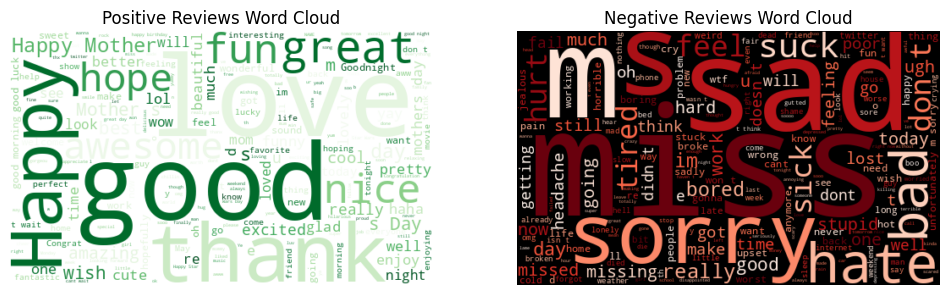

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

# Assuming your DataFrame has a column named 'selected_text' containing the comments:
positive_text = " ".join(df[df['sentiment'] == 'positive']['selected_text'].astype(str))  # Changed 'comment' to 'selected_text'
negative_text = " ".join(df[df['sentiment'] == 'negative']['selected_text'].astype(str))  # Changed 'comment' to 'selected_text'

# Generate Word Clouds (rest of the code remains the same)
wordcloud_positive = WordCloud(width=500, height=300, background_color='white', colormap='Greens_r').generate(positive_text)
wordcloud_negative = WordCloud(width=500, height=300, background_color='black', colormap='Reds').generate(negative_text)

# Plot Word Clouds
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title("Positive Reviews Word Cloud")
ax[0].axis("off")

ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title("Negative Reviews Word Cloud")
ax[1].axis("off")

plt.show()